In [ ]:
import cv2
import os
import pandas as pd
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [ ]:
X = []
y = []
datapath ='train'
categ = ['airplane','bus','car','motorcycle','truck']
for i in categ:
  sub_path = os.path.join(datapath,i)
  print(sub_path)
  images = os.listdir(sub_path)
  for j in images:
    img_path = os.path.join(sub_path,j)
    img_array = cv2.imread(img_path)
    img_array_rgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    img_resize = cv2.resize(img_array_rgb,(150,150))
    X.append(img_resize)
    y.append(categ.index(i))
  print('Loaded Category',i)

train\airplane
Loaded Category airplane
train\bus
Loaded Category bus
train\car
Loaded Category car
train\motorcycle
Loaded Category motorcycle
train\truck
Loaded Category truck


In [ ]:
import numpy as np
X = np.array(X)/255.0
y = np.array(y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train.shape,y_train.shape

((3491, 150, 150, 3), (3491,))

In [8]:
X_test.shape,y_test.shape

((1497, 150, 150, 3), (1497,))

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)


In [11]:
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
    
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  

model.add(Dense(5, activation='softmax'))  



c:\Users\sonal\PycharmProjects\luminar\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,epochs=100,batch_size=50,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 550ms/step - accuracy: 0.4412 - loss: 2.8473 - val_accuracy: 0.2759 - val_loss: 8.2837
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 507ms/step - accuracy: 0.5979 - loss: 0.9900 - val_accuracy: 0.2198 - val_loss: 14.3573
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 504ms/step - accuracy: 0.6212 - loss: 0.9061 - val_accuracy: 0.2158 - val_loss: 15.9743
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 507ms/step - accuracy: 0.6868 - loss: 0.7973 - val_accuracy: 0.2305 - val_loss: 12.2780
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - accuracy: 0.7221 - loss: 0.6669 - val_accuracy: 0.2619 - val_loss: 11.1147
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 508ms/step - accuracy: 0.7244 - loss: 0.6635 - val_accuracy: 0.4676 - val_loss: 4.5054
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 35s 506ms/step - accuracy: 0.7737 - loss: 0.5734 - val_accuracy: 0.6647 - val_loss: 1.2868
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 510ms/step - accuracy: 0.7831 - loss: 0.532

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,176,433 (27.38 MB)

 Trainable params: 2,392,069 (9.13 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 4,784,140 (18.25 MB)

In [15]:
model.evaluate(X_test,y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8019 - loss: 0.7413


[0.7657811641693115, 0.7995991706848145]

In [ ]:
def predict_new(pathfile,model1):
  categories = ['airplane','bus','car','motorcycle','truck']
  img = cv2.imread(pathfile)
  img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  resizeimg = cv2.resize(img_rgb,(150,150))
  resizeimg = resizeimg/255.0
  reshapedimg = resizeimg.reshape(1,150,150,3)
  predi = model1.predict(reshapedimg)
  inde = predi.argmax()
  return categories[inde]

In [ ]:
predict_new('test_images\1.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


'motorcycle'

In [ ]:
predict_new('test_images\i20_Modelpc.png',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


'car'

In [ ]:
predict_new('test_images\truck_test.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'bus'

In [ ]:
predict_new('test_images\1.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'motorcycle'

In [ ]:
model.save('final_trained_model.h5')

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred, axis=1) 

y_test_classes = y_test  

report = classification_report(y_test_classes, y_pred_classes)
print(report)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       316
           1       0.79      0.74      0.77       300
           2       0.83      0.83      0.83       303
           3       0.97      0.77      0.86       304
           4       0.60      0.78      0.68       274

    accuracy                           0.80      1497
   macro avg       0.81      0.80      0.80      1497
weighted avg       0.82      0.80      0.80      1497



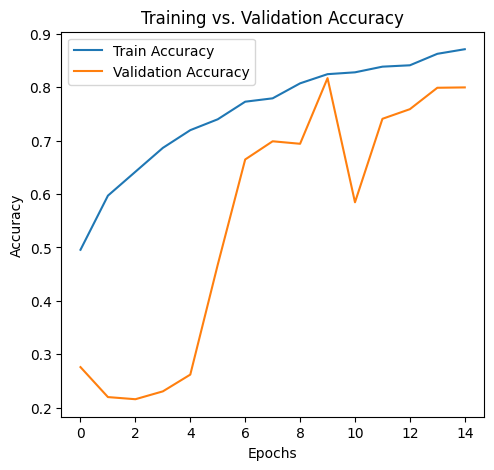

In [53]:
import matplotlib.pyplot as plt
history = model.history

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()
